<a href="https://colab.research.google.com/github/highRisk911/Lab1/blob/main/LR3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота 3
Іщенка Дмитра Романовича


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

import matplotlib.colors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
 
import sklearn.datasets as dt
 
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, mean_squared_error, balanced_accuracy_score, f1_score, log_loss

In [ ]:
from numpy.core.fromnumeric import reshape

x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([25, 225, 626, 1225, 2025, 3025])

print(x)
print(y)

model = LinearRegression().fit(x, y)

score = model.score(x, y)
print(score)

test_x = np.array([16, 20, 30]).reshape((-1, 1))
pred_y = model.predict(test_x)
print(f'Prediction: {pred_y}')

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[  25  225  626 1225 2025 3025]
0.9441262593318293
Prediction: [ 351.87333333  591.86190476 1191.83333333]


In [ ]:
 
seed = 11
rand_state = 11
 
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

In [ ]:
rand = np.random.RandomState(seed)    

dist_list = ['uniform','normal','exponential','lognormal','chisquare','beta']
param_list = ['-1,1','0,1','1','0,1','2','0.5,0.9']
colors_list = ['green','blue','yellow','cyan','magenta','pink']

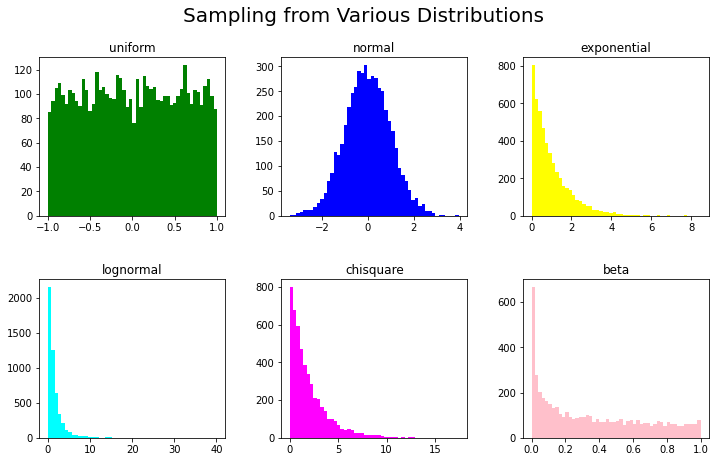

In [ ]:
fig,ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 7))
plt_ind_list = np.arange(6) + 231

for dist, plt_ind, param, colors in zip(dist_list, plt_ind_list, param_list, colors_list):
    x = eval('rand.'+dist+'('+param+',5000)') 
    
    plt.subplot(plt_ind)
    plt.hist(x, bins=50, color=colors)
    plt.title(dist)

fig.subplots_adjust(hspace=0.4, wspace=.3) 
plt.suptitle('Sampling from Various Distributions', fontsize=20)
plt.show()

# make_regression

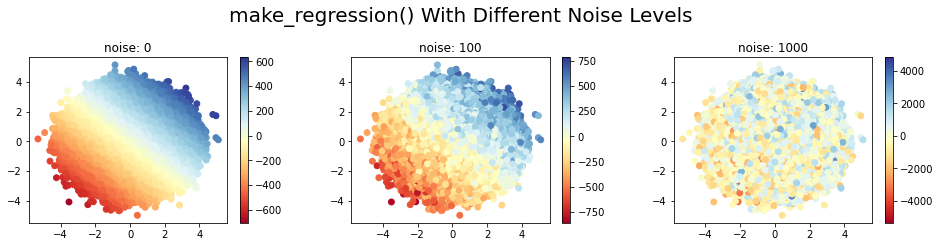

In [ ]:
map_colors = plt.cm.get_cmap('RdYlBu')
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,7))
plt_ind_list = np.arange(3) + 231

for noise, plt_ind in zip([0, 100, 1000], plt_ind_list): 
    x, y = dt.make_regression(n_samples=1600000,
                             n_features=2,
                             noise=noise,
                             random_state=rand_state) 
    
    plt.subplot(plt_ind)
    my_scatter_plot = plt.scatter(x[:,0],
                                  x[:,1],
                                  c=y,
                                  vmin=min(y),
                                  vmax=max(y),
                                  s=35,
                                  cmap=color_map)
    
    plt.title('noise: ' + str(noise))
    plt.colorbar(my_scatter_plot)
    
fig.subplots_adjust(hspace=0.3, wspace=.3)
plt.suptitle('make_regression() With Different Noise Levels', fontsize=20)
plt.show()

In [ ]:
X, y = dt.make_regression(n_targets=1)
y = y.astype(np.uint8)

X_train, y_train = X[:50], y[:50] 
X_test, y_test = X[50:], y[50:] 

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

print(f'Mean squared error for trained set: {mean_squared_error(y_train, y_train_pred)}')
print(f'Mean squared error for tested set: {mean_squared_error(y_train, y_test_pred)}')

Mean squared error for trained set: 5.049113690197949e-26
Mean squared error for tested set: 12172.572888512146


# Classification task

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict

y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:10000], X[:10000], y[:10000], y[:10000]
 
y_train_1 = (y_train == 1)
y_test_1 = (y_test == 1)
 
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_1)
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_1, cv=3)
 
print(f'Error matrix:\n{confusion_matrix(y_train_1, y_train_pred)}')
 
print(f'Perfect error matrix:\n{confusion_matrix(y_train_1, y_train_1)}')
 
print(f'Accurancy: {accuracy_score(y_train_1, y_train_pred)}')
 
print(f'Precision: {precision_score(y_train_1, y_train_pred)}')
 
print(f'Recall: {recall_score(y_train_1, y_train_pred)}')

Error matrix:
[[8786   87]
 [  59 1068]]
Perfect error matrix:
[[8873    0]
 [   0 1127]]
Accurancy: 0.9854
Precision: 0.9246753246753247
Recall: 0.9476486246672582


# make_classification

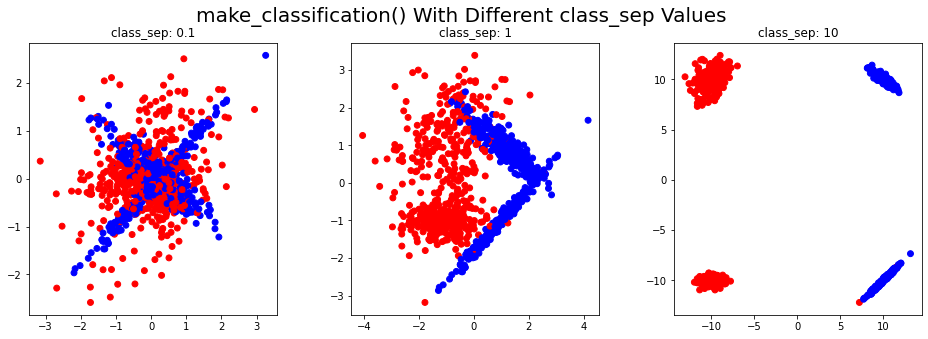

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))
plt_ind_list = np.arange(3) + 131

for class_sep, plt_ind in zip([0.1, 1, 10], plt_ind_list):
    x, y = dt.make_classification(n_samples=1000,
                                 n_features=2,
                                 n_repeated=0,
                                 class_sep=class_sep,
                                 n_redundant=0,
                                 random_state=rand_state)
    
    plt.subplot(plt_ind)
    my_scatter_plot = plt.scatter(x[:,0],
                                  x[:,1],
                                  c=y,
                                  vmin=min(y),
                                  vmax=max(y),
                                  s=35,
                                  cmap=color_map_discrete)
    plt.title('class_sep: ' + str(class_sep))

fig.subplots_adjust(hspace=0.3, wspace=.3)
plt.suptitle('make_classification() With Different class_sep Values', fontsize=20)
plt.show()

# facing recognition

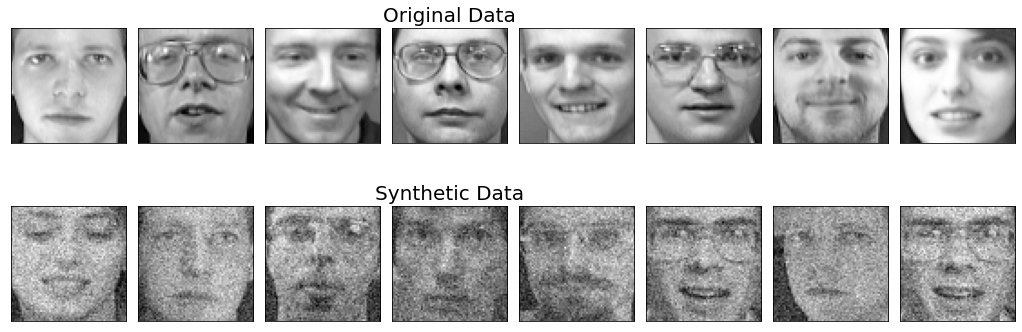

In [ ]:
 
faces = dt.fetch_olivetti_faces()
X = faces.data
 
bandwidth_params = {'bandwidth': np.arange(0.01, 1, 0.05)}
grid_search = GridSearchCV(KernelDensity(), bandwidth_params)
grid_search.fit(X)
kde = grid_search.best_estimator_
 
new_faces = kde.sample(8, random_state=rand_state)
 
fig,ax = plt.subplots(nrows=2, ncols=8,figsize=(18,6),subplot_kw=dict(xticks=[], yticks=[]))
for i in np.arange(8):
    ax[0,i].imshow(X[10*i,:].reshape(64,64),cmap=plt.cm.gray)   
    ax[1,i].imshow(new_faces[i,:].reshape(64,64),cmap=plt.cm.gray)    
ax[0,3].set_title('Original Data',fontsize=20)
ax[1,3].set_title('Synthetic Data',fontsize=20)
fig.subplots_adjust(wspace=.1)
plt.show()

# Висновок
На даній лабораторній роботі було вивчено особливості задач регресії та класифікації, метрики оцінки якості регресора та класифікатора.

З використанням бібліотеки Sklearn було вирішено задачу регресії та поглиблено вивчено функцію make_regression, задачу класифікації та функцію make_classification.

Додатково було надано значення метрик якості для задач, наведено приклад класифікації та регресії.